<a href="https://colab.research.google.com/github/rakeshxp2007/Machine-Learning/blob/main/DL_Lab_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

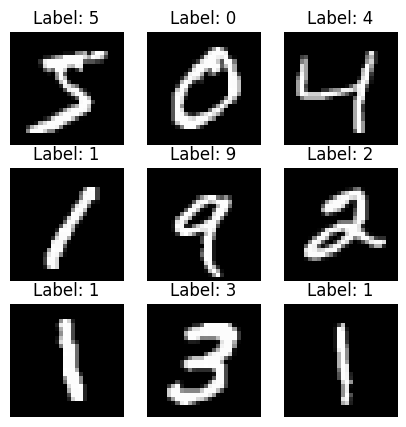

Epoch 1/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8604 - loss: 0.4634 - val_accuracy: 0.9702 - val_loss: 0.1010
Epoch 2/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9608 - loss: 0.1259 - val_accuracy: 0.9740 - val_loss: 0.0842
Epoch 3/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9720 - loss: 0.0888 - val_accuracy: 0.9775 - val_loss: 0.0712
Epoch 4/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9764 - loss: 0.0724 - val_accuracy: 0.9798 - val_loss: 0.0672
Epoch 5/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9809 - loss: 0.0582 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 6/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9831 - loss: 0.0530 - val_accuracy: 0.9820 - val_loss: 0.0651
Epoch 7/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9855 - loss: 0.0438 - val_accuracy: 0.9805 - val_loss: 0.0762
Epoch 8/15
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9853 - loss: 0

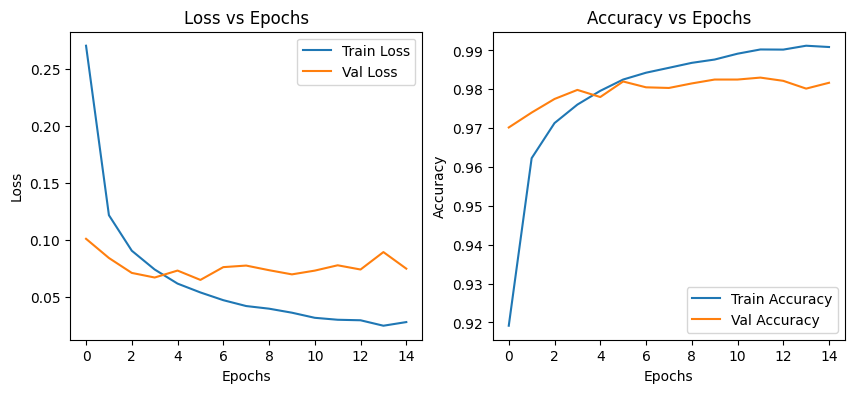

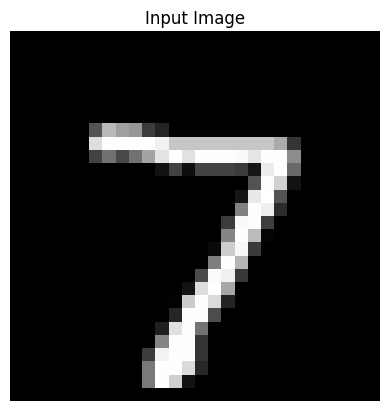

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted Label: 7


In [5]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 2: Load Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Data Preprocessing
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Step 4: Visualize Some Samples
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
plt.show()

# Step 5: Build the Model
model = Sequential([
    Flatten(input_shape=(28,28)),       # Flatten 28x28 images into 784 vector
    Dense(256, activation='relu'),      # Hidden layer with 128 neurons
    Dropout(0.2),                       # Dropout for regularization
    Dense(32, activation='relu'),       # Another hidden layer
    Dense(10, activation='softmax')     # Output layer for 10 classes
])

# Step 6: Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 7: Train the Model
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.1
)

# Step 8: Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Step 9: Plot Training History
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Step 10: Make Predictions
import numpy as np

sample_idx = 0
sample_image = x_test[sample_idx]
plt.imshow(sample_image, cmap='gray')
plt.title("Input Image")
plt.axis('off')
plt.show()

# Reshape image for prediction
sample_image = np.expand_dims(sample_image, axis=0)  # shape (1,28,28)
prediction = model.predict(sample_image)
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28,28)),

    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),

    Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary to show parameters
model.summary()

# Train
history = model.fit(
    x_train, y_train,
    epochs=40,        # Too many epochs
    batch_size=8,     # Very small batch size
    validation_split=0.1
)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)